<a href="https://colab.research.google.com/github/Nasyaagst/Aplikasi-Login/blob/main/submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nasya Fatika Augusta
- **Email:** nasyaagst@gmail.com
- **ID Dicoding:** nasyafatikaa

## Menentukan Pertanyaan Bisnis

1. Which pollutants are most prevalent in the Shunyi area?
2. How is the impact of weather variables on each pollutant concentrations in Shunyi?


## Import Semua Packages/Library yang Digunakan

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Data Wrangling

### Gathering Data

Data used in this analysis is the Air Quality Dataset which can be accesssed in Dicoding's Google Drive.

In [2]:
#Load the Air Quality dataset into a dataframe
df = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv')

Below is the snippet of PRSA_Data_Shunyi_20130301-20170228.csv

In [3]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

Now, let's assess the data by using info() function

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


It can be seen that the dataset contains 35064 rows and 18 columns.

Confused about all the attributes? Here is the glossarium you might need:


1.  **No**: A unique identifier for each data entry.
2.  **Year**: The year in which the data was recorded: 20130301 - 20170228
3.  **Month**: The month in which the data was recorded: 20130301 - 20170228
4.  **Day**: The day of the month in which the data was recorded.
5.  **Hour**: The hour of the day in which the data was recorded: 24
6.  **PM2.5**: Particulate Matter with diameter less than 2.5 micrometers, measured in micrograms per cubic meter (µg/m³):
7.  **PM10**: Particulate Matter with diameter less than 10 micrometers, measured in micrograms per cubic meter (µg/m³).
8.  **SO2**: Sulfur Dioxide concentration, measured in micrograms per cubic meter (µg/m³).
9.  **NO2**: Nitrogen Dioxide concentration, measured in micrograms per cubic meter (µg/m³).
10.  **CO**: Carbon Monoxide concentration, measured in milligrams per cubic meter (mg/m³).
11.  **O3**: Ozone concentration, measured in micrograms per cubic meter (µg/m³).
12.  **TEMP**: Temperature, measured in degrees Celsius (°C).
13.  **PRES**: Atmospheric Pressure, measured in hectopascals (hPa).
14.  **DEWP**: Dew Point Temperature, measured in degrees Celsius (°C).
15.  **RAIN**: Amount of precipitation, measured in millimeters (mm).
16.  **wd**: Wind Direction, represented as cardinal directions (e.g., N for North, S for South).
17.  **WSPM**: Wind Speed, measured in meters per second (m/s).
18.  **station**: The name or identifier of the monitoring station where the data was recorded.




Check if there are any missing values

In [5]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

The output of df.isnull().sum() indicates the number of missing values (NaN) in each column of the DataFrame.

1. There are no missing values in the "No" column.
2. There are no missing values in the date and time columns.
3. In the air polluntants concentration columns, they have varying numbers of missing values, with CO having the highest number of missing values (2178).
4. The columns which represent weather variables such as temperature, pressure, dew point, rainfall, and wind speed. They have a relatively small number of missing values.
5. This column "wd" represents wind direction. It has a moderate number of missing values.
6. There are no missing values in the "station" column.

These missing values may need to be handled before further analysis.

Now, check if there are any duplicated data:

In [6]:
df.duplicated().sum()

0

It can be seen that there is no duplicated data.

Let's see the summary statisctics of the provided dataset:

In [7]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

Let's count the number of null values in each attributes before we clean all it up:

In [8]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

### **Cleaning Pollutant Concentrations**

#####**PM2.5**


Shunyi is a district located in Beijing, China. Shunyi District is situated in the northeastern part of Beijing Municipality and is known for its suburban environment. Shunyi categorized as the Category II zone. The Chinese government set China Category II's PM2.5 level should be controlled below 35 µg/m3 by 2025 as the annual average concentration limit value for PM2.5 concentration in the air (https://www.mee.gov.cn/) and 75 µg/m3 per cubic metre for the short-term standard (24-hour or daily average)(https://www.nature.com/articles/srep14884)

In [9]:
min_pm25 = df['PM2.5'].min()
print("Minimum PM2.5 value:", min_pm25)

Minimum PM2.5 value: 2.0


In [10]:
max_pm25 = df['PM2.5'].max()
print("Maximum PM2.5 value:", max_pm25)

Maximum PM2.5 value: 941.0


In [11]:
null_pm25_rows = df[df["PM2.5"].isnull()]
print(null_pm25_rows)


          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
204      205  2013      3    9    12    NaN   NaN  NaN   NaN    NaN  90.0   
205      206  2013      3    9    13    NaN   NaN  NaN   NaN    NaN  90.0   
206      207  2013      3    9    14    NaN   NaN  NaN   NaN    NaN  90.0   
207      208  2013      3    9    15    NaN   NaN  NaN   NaN    NaN  90.0   
208      209  2013      3    9    16    NaN   NaN  NaN   NaN    NaN  90.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
34880  34881  2017      2   21     8    NaN   NaN  NaN   NaN    NaN   NaN   
34883  34884  2017      2   21    11    NaN   NaN  NaN   NaN    NaN   NaN   
34885  34886  2017      2   21    13    NaN   NaN  NaN   NaN    NaN   NaN   
34936  34937  2017      2   23    16    NaN   NaN  2.0  14.0  300.0  84.0   
34937  34938  2017      2   23    17    NaN   NaN  2.0  17.0  300.0   NaN   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
204    12.7  1006.6 -1

#####**PM10**

The Chinese government set China Category II's PM10 level should be controlled below 70 µg/m3 as the annual average concentration limit value for PM10 concentration in the air (https://www.sciencedirect.com/science/article/pii/S0147651321011994) and  µg/m3 per cubic metre for the short-term standard (24-hour or daily average)

In [12]:
min_pm10 = df["PM10"].min()
print("Minimum PM10 value:", min_pm10)

Minimum PM10 value: 2.0


In [13]:
max_pm10 = df['PM10'].max()
print("Maximum PM10 value:", max_pm10)

Maximum PM10 value: 999.0


Table below shows in which rows the PM10 reached the maximum.

In [14]:
df[df.PM10 == df.PM10.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
18620,18621,2015,4,15,20,88.0,999.0,2.0,13.0,300.0,79.0,18.9,1000.0,-1.0,0.0,NNW,4.3,Shunyi


In [15]:
df[df.PM10.isnull()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31,32,2013,3,2,7,13.0,NaN,12.0,31.0,700.0,49.0,-2.7,1032.3,-16.4,0.0,N,1.3,Shunyi
88,89,2013,3,4,16,13.0,NaN,8.0,21.0,500.0,84.0,14.9,1017.9,-13.3,0.0,SSW,3.0,Shunyi
204,205,2013,3,9,12,NaN,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,NaN,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,NaN,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,NaN,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


#####**SO2**

In [16]:
min_so2 = df["SO2"].min()
print("Minimum SO2 value:", min_so2)

Minimum SO2 value: 0.2856


In [17]:
max_so2 = df['SO2'].max()
print("Maximum SO2 value:", max_so2)

Maximum SO2 value: 239.0


Table below shows in which rows the SO2 reached the maximum.

In [18]:
df[df.SO2 == df.SO2.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25777,25778,2016,2,8,1,816.0,NaN,239.0,75.0,1700.0,5.0,-3.9,1011.4,-13.8,0.0,NNE,1.1,Shunyi


#####**NO2**

In [19]:
min_no2 = df["NO2"].min()
print("Minimum NO2 value:", min_no2)

Minimum NO2 value: 2.0


In [28]:
max_no2 = df['NO2'].max()
print("Maximum NO2 value:", max_no2)

Maximum NO2 value: 258.0


Table below shows in which rows the NO2 reached the maximum.

In [29]:
df[df.NO2 == df.NO2.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33713,33714,2017,1,3,17,449.0,563.0,36.0,258.0,7900.0,5.0,4.6,1017.8,-3.9,0.0,SE,1.6,Shunyi


#####**CO**

In [30]:
min_co = df["CO"].min()
print("Minimum CO value:", min_co)

Minimum CO value: 100.0


In [31]:
max_co = df["CO"].max()
print("Maximum CO value:", max_co)

Maximum CO value: 10000.0


Table below shows in which rows the CO reached the maximum.

In [32]:
df[df.CO == df.CO.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
19821,19822,2015,6,4,21,87.0,87.0,3.0,51.0,10000.0,32.0,18.2,997.4,16.7,1.6,ENE,0.4,Shunyi
19822,19823,2015,6,4,22,90.0,90.0,3.0,50.0,10000.0,18.0,17.7,997.5,16.6,0.1,E,0.3,Shunyi
19823,19824,2015,6,4,23,93.0,93.0,2.0,46.0,10000.0,8.0,17.5,997.2,16.5,0.0,N,1.3,Shunyi
19824,19825,2015,6,5,0,97.0,97.0,2.0,34.0,10000.0,11.0,17.4,996.6,16.4,0.2,NE,0.8,Shunyi
19828,19829,2015,6,5,4,105.0,105.0,2.0,56.0,10000.0,2.0,16.0,995.5,15.5,0.1,N,0.7,Shunyi
19830,19831,2015,6,5,6,80.0,80.0,2.0,41.0,10000.0,2.0,15.9,995.6,15.4,0.0,NE,2.0,Shunyi
24139,24140,2015,12,1,19,631.0,631.0,24.0,135.0,10000.0,7.0,-0.1,1015.9,-1.1,0.0,WNW,1.5,Shunyi


It can be concluded that carbon monoxide (CO) appears multiple times in the dataset with the highest values observed in certain row.  Further analysis and investigation may be needed to identify the specific factors contributing to these elevated CO levels and to develop appropriate measures for mitigating CO pollution in the area.

#####**O3**

In [25]:
min_o3 = df["O3"].min()
print("Minimum O3 value:", min_o3)

Minimum O3 value: 0.2142


In [26]:
max_o3 = df["O3"].max()
print("Maximum O3 value:", max_o3)

Maximum O3 value: 351.7164


Table below shows in which rows the O3 reached the maximum.

In [27]:
df[df.O3 == df.O3.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3639,3640,2013,7,30,15,166.0,139.0,NaN,28.9473,NaN,351.7164,33.9,992.2,22.7,0.0,SSE,1.9,Shunyi


Now, let's calculates the mean values for the pollutant concentrations columnns, then fills any missing values in those columns with the calculated mean values, effectively imputing missing data using the column-wise means.

In [33]:
mean_values = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

In [34]:
df.fillna(mean_values, inplace=True)

### **Cleaning 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM' attributes**

Since the total number of missing values of each attributes are relatively small, then we can drop the rows with missing values

In [35]:
df= df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

In [36]:
print("Total of duplicates: ", df.duplicated().sum())

Total of duplicates:  0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35010 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35010 non-null  int64  
 1   year     35010 non-null  int64  
 2   month    35010 non-null  int64  
 3   day      35010 non-null  int64  
 4   hour     35010 non-null  int64  
 5   PM2.5    35010 non-null  float64
 6   PM10     35010 non-null  float64
 7   SO2      35010 non-null  float64
 8   NO2      35010 non-null  float64
 9   CO       35010 non-null  float64
 10  O3       35010 non-null  float64
 11  TEMP     35010 non-null  float64
 12  PRES     35010 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35010 non-null  float64
 15  wd       34572 non-null  object 
 16  WSPM     35010 non-null  float64
 17  station  35010 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


In [38]:
print(df.isnull().sum())

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         438
WSPM         0
station      0
dtype: int64


### **Cleaning 'wd' attributes**

Let's count first each values in the 'wd' attributes.

In [39]:
df.wd.value_counts()

NNE    4540
N      3877
NE     3349
SSE    2963
SE     2665
S      2612
NW     2444
WNW    2050
NNW    1656
SSW    1586
ENE    1416
ESE    1376
W      1177
E      1153
SW      971
WSW     737
Name: wd, dtype: int64

Note:

1.  NNE: North-North-East (4540 occurrences)
2.  N: North (3877 occurrences)
3.  NE: North-East (3349 occurrences)
4.  SSE: South-South-East (2963 occurrences)
5.  SE: South-East (2665 occurrences)
6.  S: South (2612 occurrences)
7.  NW: North-West (2444 occurrences)
8.  WNW: West-North-West (2050 occurrences)
9.  NNW: North-North-West (1656 occurrences)
10. SSW: South-South-West (1586 occurrences)
11. ENE: East-North-East (1416 occurrences)
12. ESE: East-South-East (1376 occurrences)
13. W: West (1177 occurrences)
14. E: East (1153 occurrences)
15. SW: South-West (971 occurrences)
16. WSW: West-South-West (737 occurrences)

If we add all the amounts, the number of rows that already contain a valid value is 33952 row. However, we have 35010 rows. So, let's handle the missing value!

In [40]:
null_wd_count = df['wd'].isnull().sum()
print("Number of null values in the 'wd' variable:", null_wd_count)

Number of null values in the 'wd' variable: 438


In [41]:
df['wd'].fillna('NaN', inplace=True)

Seems we already filled all the NaN in the 'wd' attributes. Now, let's check each attributes that still contain the missing values

In [42]:
print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Great! There is no more missing value in our dataset. Let's check with info()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35010 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35010 non-null  int64  
 1   year     35010 non-null  int64  
 2   month    35010 non-null  int64  
 3   day      35010 non-null  int64  
 4   hour     35010 non-null  int64  
 5   PM2.5    35010 non-null  float64
 6   PM10     35010 non-null  float64
 7   SO2      35010 non-null  float64
 8   NO2      35010 non-null  float64
 9   CO       35010 non-null  float64
 10  O3       35010 non-null  float64
 11  TEMP     35010 non-null  float64
 12  PRES     35010 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35010 non-null  float64
 15  wd       35010 non-null  object 
 16  WSPM     35010 non-null  float64
 17  station  35010 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 5.1+ MB


Let's check how many unique values in each rows:

In [44]:
df.nunique()

No         35010
year           5
month         12
day           31
hour          24
PM2.5        568
PM10         606
SO2          268
NO2          518
CO           116
O3           962
TEMP         985
PRES         602
DEWP         608
RAIN         120
wd            17
WSPM         103
station        1
dtype: int64

Everything is clean now! Let's go to the next step!

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010.000000,35010,35010.000000,35010
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN,Shunyi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4540,NaN,35010
mean,17526.187861,2014.661411,6.528278,15.724907,11.500114,79.490475,98.757936,13.576606,43.914211,1187.144452,55.221957,13.387265,1013.062975,2.465036,0.061100,NaN,1.807644,NaN
std,10123.155987,1.177138,3.447051,8.799894,6.923325,80.181199,88.470557,19.213969,30.396193,1120.144926,53.723193,11.483828,10.177159,13.726622,0.761701,NaN,1.287808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000,NaN
25%,8756.250000,2014.000000,4.000000,8.000000,5.250000,20.000000,32.000000,2.000000,20.000000,500.000000,11.000000,3.000000,1004.700000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17540.500000,2015.000000,7.000000,16.000000,11.000000,57.000000,79.000000,5.140800,39.000000,900.000000,47.000000,14.400000,1012.700000,3.100000,0.000000,NaN,1.500000,NaN
75%,26293.750000,2016.000000,10.000000,23.000000,18.000000,109.000000,137.000000,16.000000,61.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,NaN,2.300000,NaN


Based on the table above, we have 35010 total rows to be analyzed. This is a time-series dataset, which ranging from March 1st 2013 until February 28th 2017. The dataset contains a detail information 24-hours non-stop about Air Quality in Shunyi.

Based on the dataset, it can be known that the highest temperature is 40,6°C and the lowest is -16°C.

For the atmospheric pressure (PRES), it can be seen that the highest is 1042,8 hPa and the lowest it 988 hPa.

The dew point temperature, the highest point is 27,5°C and the lowest is -36°C.

For the amount of precipitation, the highest is 37,3 mm and the lowest is 0 mm.

However, the wind speed got the highest point at 12,8 m/s and the lowest at 0 m/s.

For more information about each pollutant concentrations can be seen above.

As we know that AQI is based on the measurement of five most abundantly found pollutants in the air: PM2.5, PM10, SO2 (Sulphur Dioxide), NO2, (Nitrogen Dioxide), CO (Carbon Monoxide), O3 (Ozone).

Let's take a look on when each of these pollutants reaches its highest value?

In [46]:
# Find the date and time when each pollutant reaches its highest value
max_pm25 = df[df['PM2.5'] == df['PM2.5'].max()]
max_pm10 = df[df['PM10'] == df['PM10'].max()]
max_so2 = df[df['SO2'] == df['SO2'].max()]
max_no2 = df[df['NO2'] == df['NO2'].max()]
max_co = df[df['CO'] == df['CO'].max()]
max_o3 = df[df['O3'] == df['O3'].max()]

In [47]:
# Print the results
print("Date and time when each pollutant reaches its highest value:")
print("PM2.5:", max_pm25[['year', 'month', 'day', 'hour']])
print("PM10:", max_pm10[['year', 'month', 'day', 'hour']])
print("SO2:", max_so2[['year', 'month', 'day', 'hour']])
print("NO2:", max_no2[['year', 'month', 'day', 'hour']])
print("CO:", max_co[['year', 'month', 'day', 'hour']])
print("O3:", max_o3[['year', 'month', 'day', 'hour']])

Date and time when each pollutant reaches its highest value:
PM2.5:        year  month  day  hour
25778  2016      2    8     2
PM10:        year  month  day  hour
18620  2015      4   15    20
SO2:        year  month  day  hour
25777  2016      2    8     1
NO2:        year  month  day  hour
33713  2017      1    3    17
CO:        year  month  day  hour
19821  2015      6    4    21
19822  2015      6    4    22
19823  2015      6    4    23
19824  2015      6    5     0
19828  2015      6    5     4
19830  2015      6    5     6
24139  2015     12    1    19
O3:       year  month  day  hour
3639  2013      7   30    15


 Cool! What about we explore when each of these pollutants reaches its lowest value?

In [48]:
# Find the date and time when each pollutant reaches its lowest value
min_pm25 = df[df['PM2.5'] == df['PM2.5'].min()]
min_pm10 = df[df['PM10'] == df['PM10'].min()]
min_so2 = df[df['SO2'] == df['SO2'].min()]
min_no2 = df[df['NO2'] == df['NO2'].min()]
min_co = df[df['CO'] == df['CO'].min()]
min_o3 = df[df['O3'] == df['O3'].min()]

In [49]:
# Print the results
print("Date and time when each pollutant reaches its lowest value:")
print("PM2.5:", min_pm25[['year', 'month', 'day', 'hour']])
print("PM10:", min_pm10[['year', 'month', 'day', 'hour']])
print("SO2:", min_so2[['year', 'month', 'day', 'hour']])
print("NO2:", min_no2[['year', 'month', 'day', 'hour']])
print("CO:", min_co[['year', 'month', 'day', 'hour']])
print("O3:", min_o3[['year', 'month', 'day', 'hour']])

Date and time when each pollutant reaches its lowest value:
PM2.5:        year  month  day  hour
33940  2017      1   13     4
33941  2017      1   13     5
33953  2017      1   13    17
33965  2017      1   14     5
33974  2017      1   14    14
PM10:       year  month  day  hour
853   2013      4    5    13
978   2013      4   10    18
2429  2013      6   10     5
2468  2013      6   11    20
3767  2013      8    4    23
3821  2013      8    7     5
4349  2013      8   29     5
4494  2013      9    4     6
SO2:       year  month  day  hour
999   2013      4   11    15
2438  2013      6   10    14
2440  2013      6   10    16
3448  2013      7   22    16
3476  2013      7   23    20
3487  2013      7   24     7
3488  2013      7   24     8
3489  2013      7   24     9
3589  2013      7   28    13
3596  2013      7   28    20
3612  2013      7   29    12
3613  2013      7   29    13
3723  2013      8    3     3
3724  2013      8    3     4
3732  2013      8    3    12
3734  2013      8

Now, let's dig into the mean and median of each pollutants from the time range that has given.

In [50]:
# Calculate mean or median concentration of each pollutant
pollutant_mean = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()
pollutant_median = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].median()

In [51]:
# Print the mean and median concentrations of pollutants
print("Mean concentrations of pollutants:")
print(pollutant_mean)
print("\nMedian concentrations of pollutants:")
print(pollutant_median)

Mean concentrations of pollutants:
PM2.5      79.490475
PM10       98.757936
SO2        13.576606
NO2        43.914211
CO       1187.144452
O3         55.221957
dtype: float64

Median concentrations of pollutants:
PM2.5     57.0000
PM10      79.0000
SO2        5.1408
NO2       39.0000
CO       900.0000
O3        47.0000
dtype: float64


From this time range, can we know when was Shunyi got the highest Air Quality Index (AQI)? Of course! Here is how:

In [70]:
# define a function to calculate AQI
def calculate_aqi(pm25, pm10, so2, no2, co, o3):
    # parameter contains each pollutant concentrations
    aqi = max(pm25, pm10, so2, no2, co, o3)
    return aqi

# Calculate AQI for each day
df['AQI'] = df.apply(lambda row: calculate_aqi(row['PM2.5'], row['PM10'], row['SO2'], row['NO2'], row['CO'], row['O3']), axis=1)

# Find the day with the highest AQI
day_max_aqi = df.loc[df['AQI'].idxmax()]

# Extract the date components
highest_aqi_date = day_max_aqi[['year', 'month', 'day']]

# Format the date
date_str = f"{highest_aqi_date['month']}/{highest_aqi_date['day']}/{highest_aqi_date['year']}"

# Print the result
print("The day with the highest AQI in Shunyi:")
print(f"- Date: {date_str}")
print(f"- AQI: {day_max_aqi['AQI']}")

The day with the highest AQI in Shunyi:
- Date: 6/4/2015
- AQI: 10000.0


According to airnow.gov, the Air Quality Index (AQI) typically ranges from 0 to 500. An AQI value of 10000.0 is indeed seems unrealistic. It would suggest extremely hazardous air quality conditions.

There are few possible reasons why we got this such high AQI value:
1. Data input error
2. Outlier: It needs a deeper research to give a limitation for each pollutant concentrations in terms of this times range.

After carefully review the data, we will surely get the valid AQI value. But for this project, let's just take it as a valid value.

## Visualization & Explanatory Analysis

###**Question 1: Which pollutants are most prevalent in the Shunyi area?**

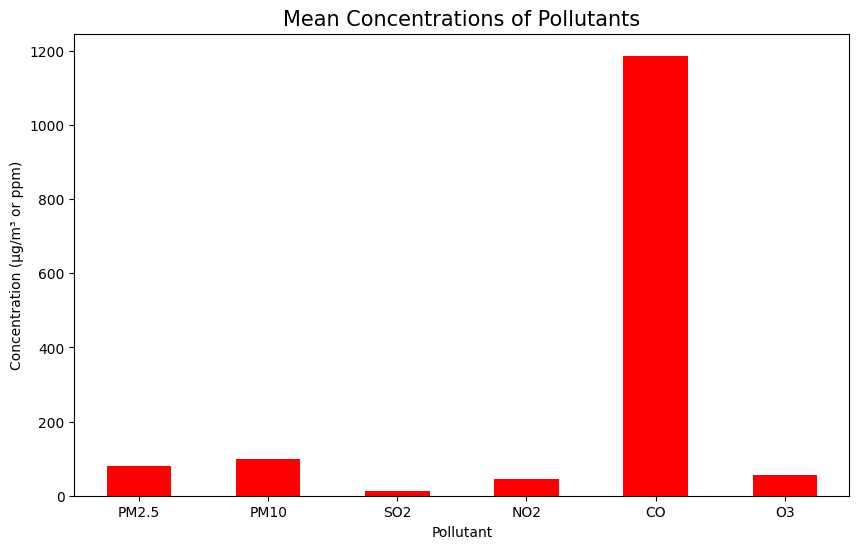

In [53]:
plt.figure(figsize=(10, 6))

pollutant_mean.plot(kind='bar', color='red')

plt.title("Mean Concentrations of Pollutants", loc="center", fontsize=15)

plt.xlabel('Pollutant')

plt.ylabel('Concentration (µg/m³ or ppm)')

plt.xticks(rotation=0)

plt.show()

### **Question 2: How is the impact of weather variables on each pollutant concentrations in Shunyi?**


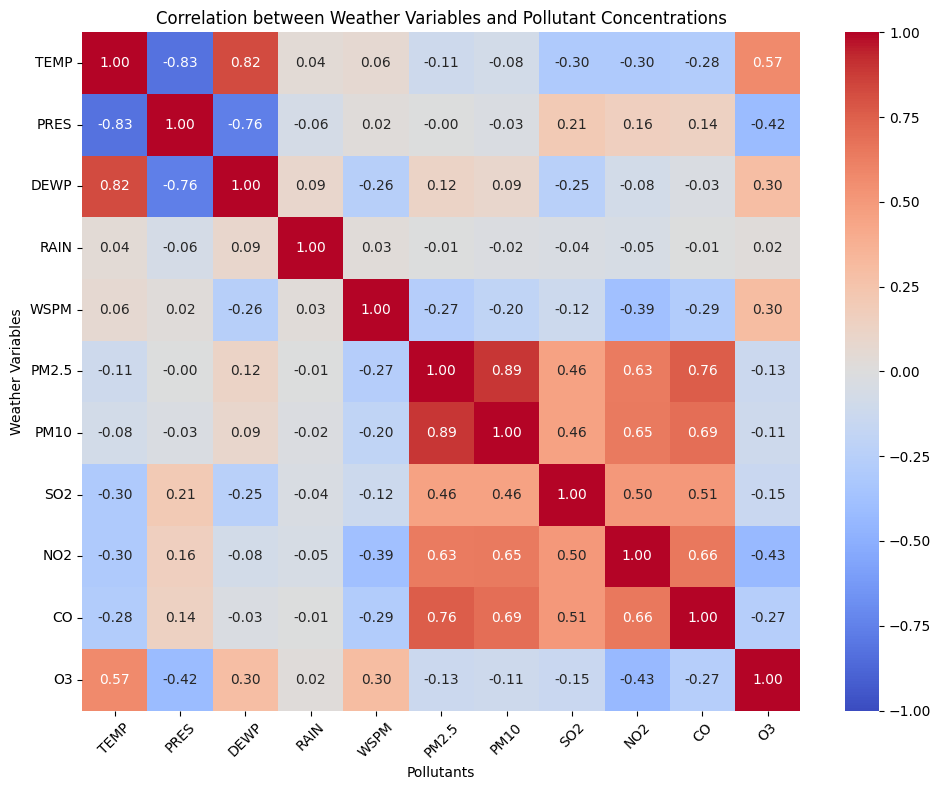

In [66]:
weather_variables = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
selected_columns = weather_variables + pollutants

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation between Weather Variables and Pollutant Concentrations')
plt.xlabel('Pollutants')
plt.ylabel('Weather Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [94]:
df.to_csv("all_data.csv", index=False)

## Conclusion

- **Conclution question 1:**

Pollutant concentration that are most prevalent in Shunyi area is CO (Carbon Monoxide) which has mean at 1187.144452 in the time range that has given (March 1st 2013 until February 28th 2017).

- **Conclution question 2:**

1. Temperature (TEMP) shows a strong negative correlation with atmospheric pressure (PRES) (-0.83) and a moderate positive correlation with dew point temperature (DEWP) (0.82). This suggests that higher temperatures are associated with lower atmospheric pressure and higher dew point temperatures.

2. Atmospheric pressure (PRES) has a strong negative correlation with temperature (-0.83) and a moderate negative correlation with dew point temperature (-0.76). This indicates that higher atmospheric pressure tends to occur with lower temperatures and dew point temperatures.

3. Dew point temperature (DEWP) shows a strong positive correlation with temperature (0.82) and a moderate negative correlation with atmospheric pressure (-0.76). This implies that higher dew point temperatures are associated with higher temperatures and lower atmospheric pressure.

4. Wind speed (WSPM) exhibits a weak positive correlation with temperature (0.06) and a moderate negative correlation with dew point temperature (-0.26). This suggests that higher wind speeds are slightly associated with higher temperatures and lower dew point temperatures.

**Pollutant concentrations:**
1. PM2.5 and PM10 have a strong positive correlation (0.90), indicating that they tend to increase or decrease together.

2. SO2, NO2, and CO show moderate to strong positive correlations with each other (ranging from 0.45 to 0.66), indicating similar behavior in their concentrations.
3. O3 has a weak negative correlation with temperature (-0.13) and a moderate negative correlation with atmospheric pressure (-0.42). This suggests that higher temperatures and lower atmospheric pressure are associated with lower ozone concentrations.

Weather variables such as temperature, atmospheric pressure, dew point temperature, and wind speed have significant correlations with each other, indicating interdependencies. Additionally, certain pollutants show correlations with each other and with weather variables. However, further analysis are required to establish causality and understand the underlying mechanisms.